In [140]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [141]:
data = 'stars2.csv'

df = pd.read_csv(data, header=None)
pd

<module 'pandas' from 'C:\\Users\\gyawa\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [142]:
df.shape

(4660, 7)

In [143]:
df.head()

,0,1,2,3,4,5,6
0,3060,0.0024,0.17,16.12,Red,M,1
1,2950,0.0021,0.18,16.50,Red,M,1
2,3110,0.0023,0.16,15.80,Red,M,1
3,2800,0.0018,0.15,17.20,Red,M,1
4,3020,0.0025,0.19,15.95,Red,M,1


In [144]:
col_names = ['Temperature', 'Luminosity', 'Relative_Radius', 'Absolute_Magnitude', 'color', 'Spectral_class', 'Type']


df.columns = col_names

col_names

['Temperature',
 'Luminosity',
 'Relative_Radius',
 'Absolute_Magnitude',
 'color',
 'Spectral_class',
 'Type']

In [145]:
df.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class,Type
0,3060,0.0024,0.17,16.12,Red,M,1
1,2950,0.0021,0.18,16.50,Red,M,1
2,3110,0.0023,0.16,15.80,Red,M,1
3,2800,0.0018,0.15,17.20,Red,M,1
4,3020,0.0025,0.19,15.95,Red,M,1


In [146]:
col_names = ['Temperature', 'Luminosity', 'Relative_Radius', 'Absolute_Magnitude', 'color', 'Spectral_class', 'Type']


for col in col_names:
    
    print(df[col].value_counts())

Temperature
3605     11
3606     11
3607     11
3604     10
3608     10
         ..
4977      1
4983      1
4976      1
4975      1
37902     1
Name: count, Length: 3371, dtype: int64
Luminosity
200000.00000    38
0.00050         37
0.00140         36
0.00015         35
0.00160         33
                ..
748892.00000     1
748889.00000     1
748891.00000     1
347810.00000     1
294883.00000     1
Name: count, Length: 776, dtype: int64
Relative_Radius
24.0000      40
1356.0000    40
36.0000      34
35.0000      30
6.3900       29
             ..
0.0145        1
0.0137        1
0.0144        1
0.0143        1
1.1800        1
Name: count, Length: 740, dtype: int64
Absolute_Magnitude
 1.236     10
 12.970     9
 12.950     9
 12.930     9
-6.250      9
           ..
-10.300     1
-10.310     1
-10.320     1
-10.330     1
-10.630     1
Name: count, Length: 2126, dtype: int64
color
Red                2183
Blue               1099
BlueWhite           791
White               200
YellowWhite

In [147]:
df ['Type'].value_counts()

Type
2    801
6    800
5    790
3    779
4    748
1    742
Name: count, dtype: int64

In [148]:
df['Relative_Radius'].value_counts()

Relative_Radius
24.0000      40
1356.0000    40
36.0000      34
35.0000      30
6.3900       29
             ..
0.0145        1
0.0137        1
0.0144        1
0.0143        1
1.1800        1
Name: count, Length: 740, dtype: int64

In [149]:
df['Spectral_class'].value_counts()

Spectral_class
M    2163
B     900
O     779
A     371
F     307
K     120
G      20
Name: count, dtype: int64

In [150]:
df['Temperature'].value_counts()

Temperature
3605     11
3606     11
3607     11
3604     10
3608     10
         ..
4977      1
4983      1
4976      1
4975      1
37902     1
Name: count, Length: 3371, dtype: int64

In [151]:
df['Luminosity'].value_counts()

Luminosity
200000.00000    38
0.00050         37
0.00140         36
0.00015         35
0.00160         33
                ..
748892.00000     1
748889.00000     1
748891.00000     1
347810.00000     1
294883.00000     1
Name: count, Length: 776, dtype: int64

In [152]:
df['Absolute_Magnitude'].value_counts()

Absolute_Magnitude
 1.236     10
 12.970     9
 12.950     9
 12.930     9
-6.250      9
           ..
-10.300     1
-10.310     1
-10.320     1
-10.330     1
-10.630     1
Name: count, Length: 2126, dtype: int64

In [153]:
df['color'].value_counts()

color
Red                2183
Blue               1099
BlueWhite           791
White               200
YellowWhite         170
Yellowish            60
Yellowish-White      57
Whitish              40
Orange               40
OrangeRed            20
Name: count, dtype: int64

In [154]:
df.isnull()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class,Type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4655,False,False,False,False,False,False,False
4656,False,False,False,False,False,False,False
4657,False,False,False,False,False,False,False
4658,False,False,False,False,False,False,False


In [155]:
df.isnull().sum()

Temperature           0
Luminosity            0
Relative_Radius       0
Absolute_Magnitude    0
color                 0
Spectral_class        0
Type                  0
dtype: int64

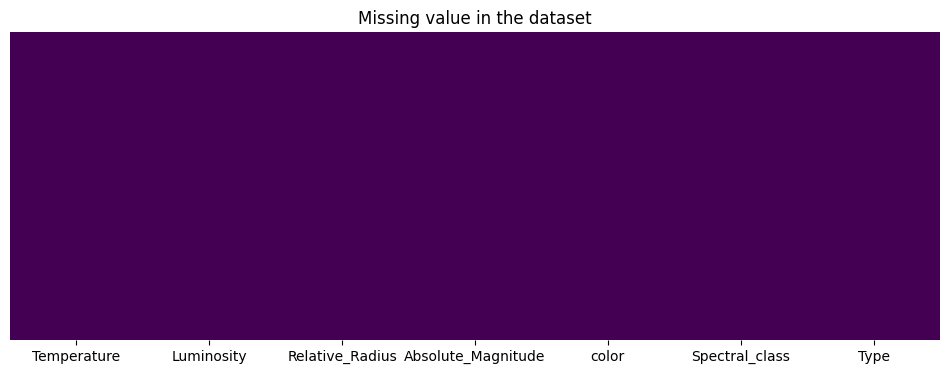

In [156]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [157]:
X = df.drop(['Type'], axis=1)

y = df['Type']

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660 entries, 0 to 4659
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         4660 non-null   int64  
 1   Luminosity          4660 non-null   float64
 2   Relative_Radius     4660 non-null   float64
 3   Absolute_Magnitude  4660 non-null   float64
 4   color               4660 non-null   object 
 5   Spectral_class      4660 non-null   object 
 6   Type                4660 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 255.0+ KB


In [159]:
df.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class,Type
0,3060,0.0024,0.17,16.12,Red,M,1
1,2950,0.0021,0.18,16.50,Red,M,1
2,3110,0.0023,0.16,15.80,Red,M,1
3,2800,0.0018,0.15,17.20,Red,M,1
4,3020,0.0025,0.19,15.95,Red,M,1


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3122, 6), (1538, 6))

In [161]:
X_train.dtypes

Temperature             int64
Luminosity            float64
Relative_Radius       float64
Absolute_Magnitude    float64
color                  object
Spectral_class         object
dtype: object

In [162]:
X_train.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class
752,3357,339900.000000,22.9000,-6.34,Red,M
3998,13332,0.001100,0.0116,13.06,Blue,B
2486,2859,0.000896,0.0782,19.62,Red,M
2722,13421,0.000580,0.0098,13.69,BlueWhite,B
2154,3596,126100.000000,1124.1000,-10.97,Red,M


In [163]:
import category_encoders as ce

In [164]:
encoder = ce.OrdinalEncoder(cols=['Temperature', 'Luminosity', 'Relative_Radius', 'Absolute_Magnitude', 'color', 'Spectral_class'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [165]:
X_train.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class
752,1,1,1,1,1,1
3998,2,2,2,2,2,2
2486,3,3,3,3,1,1
2722,4,4,4,4,3,2
2154,5,5,5,5,1,1


In [166]:
X_test.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class
1231,2415.0,334.0,369.0,86.0,1,1
3918,923.0,223.0,215.0,-1.0,1,1
3452,-1.0,409.0,364.0,541.0,2,4
1941,-1.0,346.0,328.0,362.0,2,4
2453,-1.0,636.0,290.0,1011.0,1,1


In [167]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

In [168]:
missing_values = X_train.isnull().sum()
print(missing_values)

Temperature           0
Luminosity            0
Relative_Radius       0
Absolute_Magnitude    0
color                 0
Spectral_class        0
dtype: int64


In [169]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [170]:
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [171]:
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7035


In [172]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

In [173]:
# fit the model to the training set
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [174]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

In [175]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7035


In [176]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [177]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Relative_Radius       0.229372
Luminosity            0.204515
color                 0.181196
Spectral_class        0.149647
Absolute_Magnitude    0.121237
Temperature           0.114033
dtype: float64

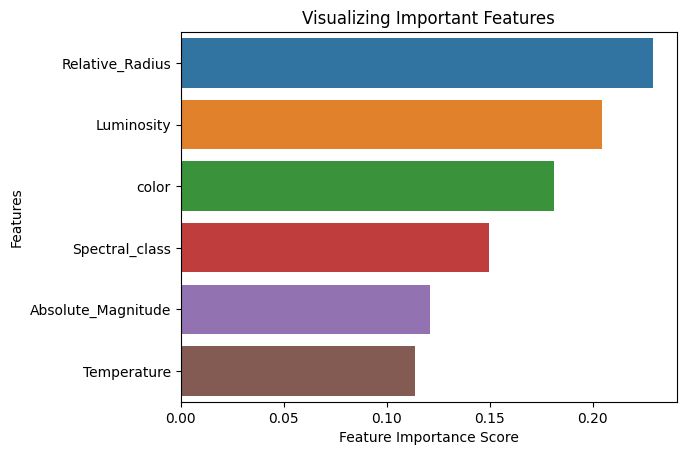

In [178]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [179]:
X = df.drop(['Type', 'Temperature', 'Absolute_Magnitude'], axis=1)
y = df['Type']

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [181]:
encoder = ce.OrdinalEncoder(cols=['Spectral_class', 'color', 'Luminosity', 'Relative_Radius'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [182]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with 2 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 2 variable removed : 0.9168


In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[238   7   0   0   1   2]
 [ 43 247   0   0   0   2]
 [  0   0 234   8   0   5]
 [  0   0   0 230   0   2]
 [  0   0   0   0 245  28]
 [  0   1  29   0   0 216]]


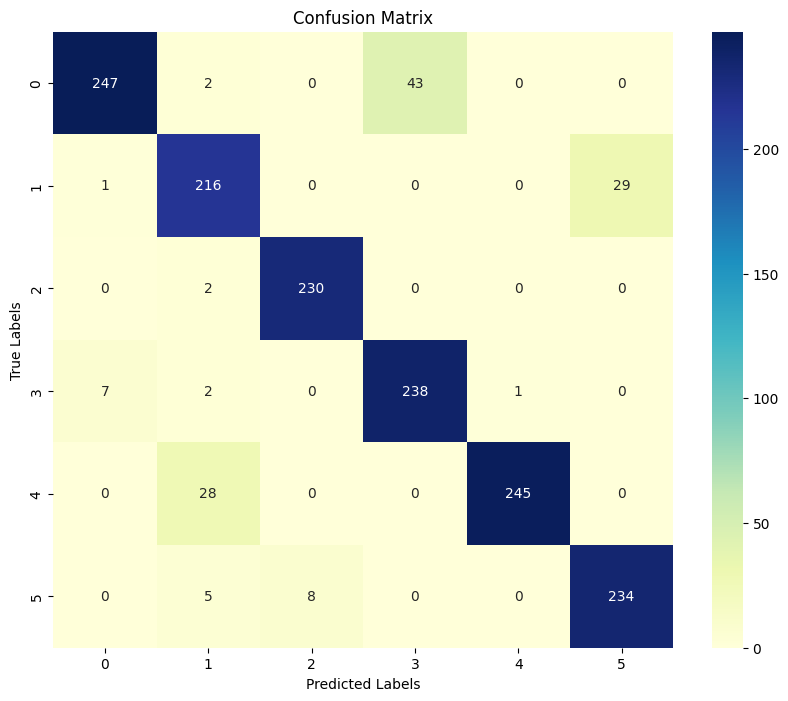

In [184]:
confusion_matrix_data = [[247, 2, 0, 43, 0, 0],
                         [1, 216, 0, 0, 0, 29],
                         [0, 2, 230, 0, 0, 0],
                         [7, 2, 0, 238, 1, 0],
                         [0, 28, 0, 0, 245, 0],
                         [0, 5, 8, 0, 0, 234]]

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.96      0.90       248
           2       0.97      0.85      0.90       292
           3       0.89      0.95      0.92       247
           4       0.97      0.99      0.98       232
           5       1.00      0.90      0.94       273
           6       0.85      0.88      0.86       246

    accuracy                           0.92      1538
   macro avg       0.92      0.92      0.92      1538
weighted avg       0.92      0.92      0.92      1538



In [186]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [187]:
X, y = make_classification(n_samples=1000, n_features=7, random_state=42)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_probs = model.predict_proba(X_test)[:, 1]

In [190]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [191]:
auc_score = roc_auc_score(y_test, y_pred_probs)

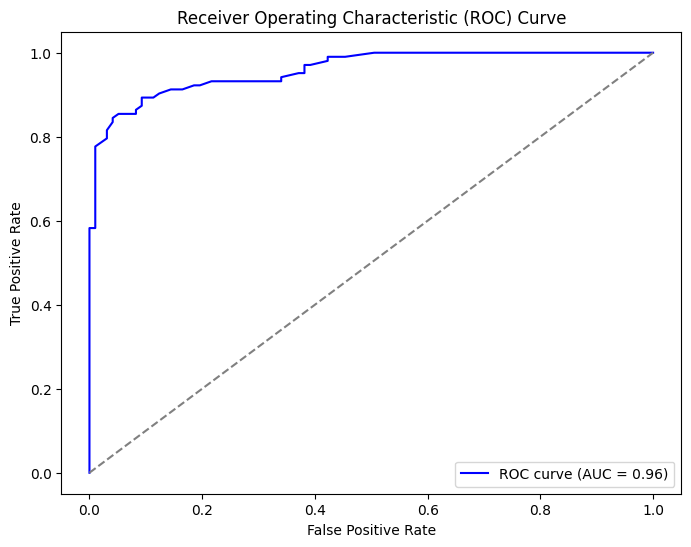

In [192]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

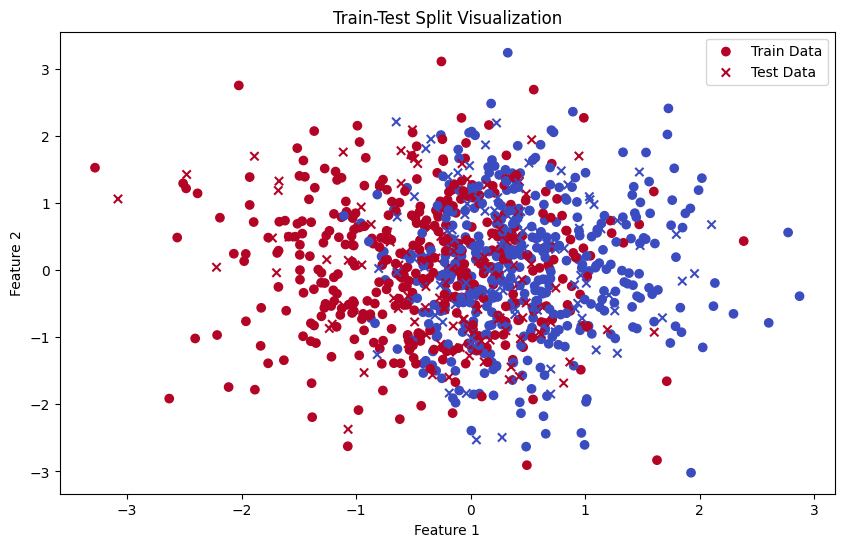

In [193]:
#Train Test Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data')
plt.title('Train-Test Split Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [194]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [195]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0])

In [196]:
logreg.predict_proba(X_test)[:,0]

array([3.88829708e-04, 8.56997907e-01, 4.10517353e-01, 7.03560615e-02,
       2.03217038e-01, 1.52654092e-01, 8.60097559e-01, 6.12017660e-01,
       8.03756654e-01, 1.69391790e-01, 1.90737133e-02, 2.31041238e-02,
       2.50105235e-03, 5.37116348e-02, 6.74755133e-01, 3.12831964e-02,
       5.19197255e-02, 2.71735300e-01, 8.99427205e-01, 5.12843445e-01,
       7.24295891e-02, 5.11551361e-01, 8.71922961e-02, 9.44397523e-01,
       9.80270670e-01, 9.57591734e-02, 2.33805450e-03, 6.91076227e-01,
       9.30555475e-01, 5.54451707e-01, 9.49549522e-01, 8.31545014e-01,
       4.22052316e-01, 9.00743217e-01, 3.55847458e-01, 5.72521969e-01,
       9.85572684e-03, 5.46809155e-01, 4.30102253e-01, 8.40369864e-01,
       9.76415013e-01, 5.86274276e-02, 5.12074070e-02, 7.17240439e-01,
       9.02304745e-01, 7.71448248e-01, 4.66882573e-03, 3.03050041e-03,
       1.73980111e-03, 8.61360294e-01, 9.69007468e-01, 1.39241520e-01,
       3.41852423e-01, 9.04979492e-02, 8.72225554e-01, 8.31931574e-02,
      

In [197]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.99961117, 0.14300209, 0.58948265, 0.92964394, 0.79678296,
       0.84734591, 0.13990244, 0.38798234, 0.19624335, 0.83060821,
       0.98092629, 0.97689588, 0.99749895, 0.94628837, 0.32524487,
       0.9687168 , 0.94808027, 0.7282647 , 0.1005728 , 0.48715655,
       0.92757041, 0.48844864, 0.9128077 , 0.05560248, 0.01972933,
       0.90424083, 0.99766195, 0.30892377, 0.06944452, 0.44554829,
       0.05045048, 0.16845499, 0.57794768, 0.09925678, 0.64415254,
       0.42747803, 0.99014427, 0.45319084, 0.56989775, 0.15963014,
       0.02358499, 0.94137257, 0.94879259, 0.28275956, 0.09769526,
       0.22855175, 0.99533117, 0.9969695 , 0.9982602 , 0.13863971,
       0.03099253, 0.86075848, 0.65814758, 0.90950205, 0.12777445,
       0.91680684, 0.12406315, 0.87199475, 0.95651975, 0.99508391,
       0.33010486, 0.19741922, 0.82475958, 0.01215681, 0.74703196,
       0.99552954, 0.06924025, 0.20092319, 0.17352331, 0.77387171,
       0.00365882, 0.04493209, 0.57918266, 0.01945465, 0.99949

In [198]:
#Check Accuracy Score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8400


In [199]:
#Compare the train-set and test-set accuracy
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [200]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8638


In [201]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8638
Test set score: 0.8400


In [202]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [203]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8650
Test set score: 0.8400


In [204]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [205]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8662
Test set score: 0.8550


In [206]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [207]:
#from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.87      0.82      0.84       103

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [208]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9065


In [209]:
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0935


In [210]:
#Precision
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9714


In [211]:
#Recall
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8470


In [212]:
# True Positive Rate
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8470


In [213]:
# False Positive Rate
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0276


In [214]:
#Specificity
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9724


In [215]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_probs = model.predict_proba(X_test)[:, 1]


In [218]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

auc_score = roc_auc_score(y_test, y_pred_probs)

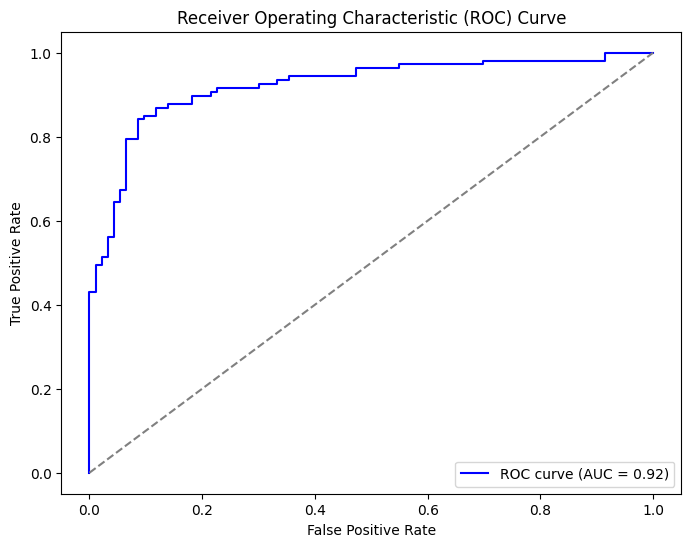

In [219]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

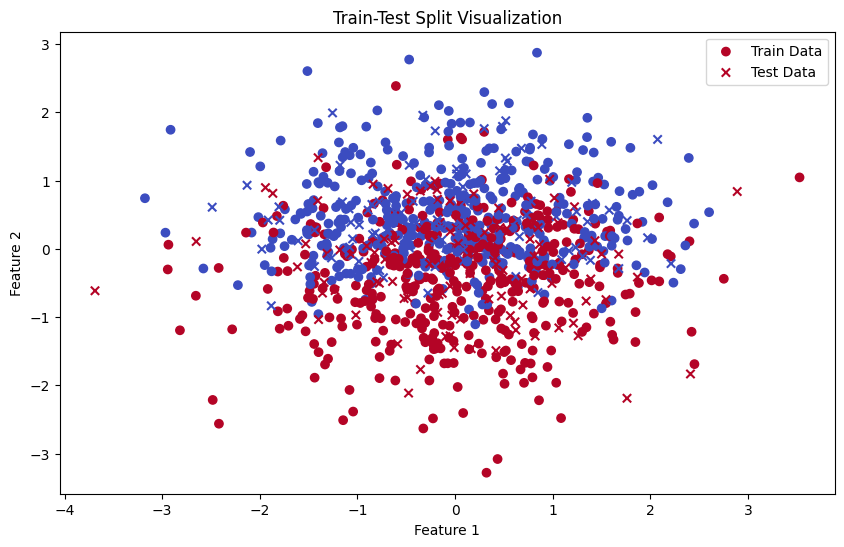

In [220]:
#Train Test Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data')
plt.title('Train-Test Split Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [221]:
clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with 2 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 2 variable removed : 0.8550


In [222]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[85  8]
 [21 86]]


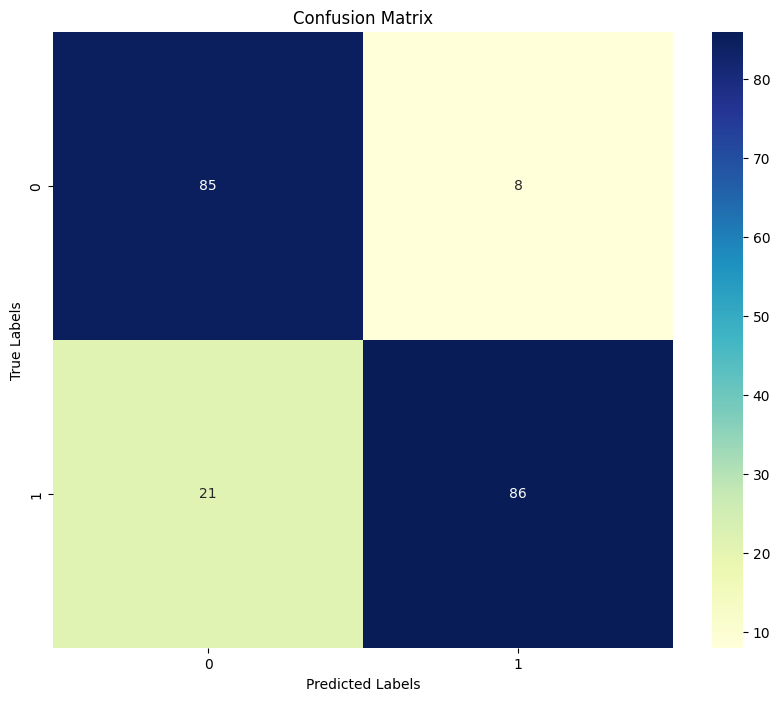

In [223]:
confusion_matrix_data =  [[85,  8],
 [21, 86]]

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [336]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [337]:
X_train.shape, X_test.shape

((3122, 6), (1538, 6))

In [338]:
# check missing values in variables

df.isnull().sum()

Temperature           0
Luminosity            0
Relative_Radius       0
Absolute_Magnitude    0
color                 0
Spectral_class        0
Type                  0
dtype: int64

In [339]:
X = df.drop(['Type'], axis=1)

y = df['Type']

In [340]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [341]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3122, 6), (1538, 6))

In [342]:
# check data types in X_train

X_train.dtypes

Temperature             int64
Luminosity            float64
Relative_Radius       float64
Absolute_Magnitude    float64
color                  object
Spectral_class         object
dtype: object

In [343]:
X_train.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class
752,3357,339900.000000,22.9000,-6.34,Red,M
3998,13332,0.001100,0.0116,13.06,Blue,B
2486,2859,0.000896,0.0782,19.62,Red,M
2722,13421,0.000580,0.0098,13.69,BlueWhite,B
2154,3596,126100.000000,1124.1000,-10.97,Red,M


In [344]:
# import category encoders

import category_encoders as ce

In [345]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [346]:
# import category encoders

import category_encoders as ce

In [347]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Temperature', 'Luminosity', 'Relative_Radius', 'Absolute_Magnitude', 'color', 'Spectral_class'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [348]:
X_train.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class
752,1,1,1,1,1,1
3998,2,2,2,2,2,2
2486,3,3,3,3,1,1
2722,4,4,4,4,3,2
2154,5,5,5,5,1,1


In [349]:
X_test.head()

,Temperature,Luminosity,Relative_Radius,Absolute_Magnitude,color,Spectral_class
1231,2415.0,334.0,369.0,86.0,1,1
3918,923.0,223.0,215.0,-1.0,1,1
3452,-1.0,409.0,364.0,541.0,2,4
1941,-1.0,346.0,328.0,362.0,2,4
2453,-1.0,636.0,290.0,1011.0,1,1


In [350]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [351]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [352]:
#Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [353]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5384


In [354]:
#Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 3, 1, ..., 4, 2, 2], dtype=int64)

In [355]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5391


In [356]:
#Visualize decision-trees

[Text(0.4583333333333333, 0.875, 'x[4] <= 1.5\ngini = 0.833\nsamples = 3122\nvalue = [494, 509, 532, 516, 517, 554]'),
 Text(0.25, 0.625, 'x[5] <= 3.0\ngini = 0.7\nsamples = 1429\nvalue = [494, 509, 0, 0, 116, 310]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 19.0\ngini = 0.696\nsamples = 1400\nvalue = [494, 509, 0, 0, 116, 281]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.52\nsamples = 112\nvalue = [74, 19, 0, 0, 9, 10]'),
 Text(0.25, 0.125, 'gini = 0.698\nsamples = 1288\nvalue = [420, 490, 0, 0, 107, 271]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 0, 0, 0, 29]'),
 Text(0.6666666666666666, 0.625, 'x[4] <= 2.5\ngini = 0.731\nsamples = 1693\nvalue = [0, 0, 532, 516, 401, 244]'),
 Text(0.5, 0.375, 'x[5] <= 3.0\ngini = 0.623\nsamples = 737\nvalue = [0, 0, 174, 62, 401, 100]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.32\nsamples = 214\nvalue = [0, 0, 174, 0, 26, 14]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.445\nsamples = 523\nvalue = [0, 0, 0, 

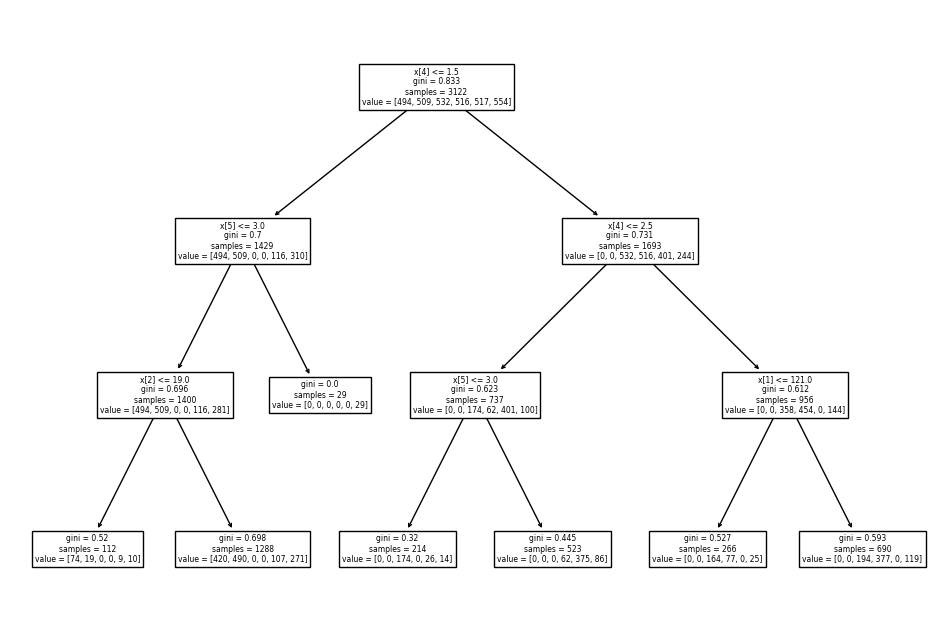

In [357]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [358]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [359]:
y_pred_en = clf_en.predict(X_test)

In [360]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5117


In [361]:
#Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 3, 1, ..., 4, 2, 2], dtype=int64)

In [362]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.5112


In [363]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5112
Test set score: 0.5117


[Text(0.4583333333333333, 0.875, 'x[4] <= 1.5\nentropy = 2.584\nsamples = 3122\nvalue = [494, 509, 532, 516, 517, 554]'),
 Text(0.25, 0.625, 'x[5] <= 3.0\nentropy = 1.833\nsamples = 1429\nvalue = [494, 509, 0, 0, 116, 310]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 19.0\nentropy = 1.824\nsamples = 1400\nvalue = [494, 509, 0, 0, 116, 281]'),
 Text(0.08333333333333333, 0.125, 'entropy = 1.433\nsamples = 112\nvalue = [74, 19, 0, 0, 9, 10]'),
 Text(0.25, 0.125, 'entropy = 1.829\nsamples = 1288\nvalue = [420, 490, 0, 0, 107, 271]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 0, 0, 29]'),
 Text(0.6666666666666666, 0.625, 'x[4] <= 2.5\nentropy = 1.942\nsamples = 1693\nvalue = [0, 0, 532, 516, 401, 244]'),
 Text(0.5, 0.375, 'x[5] <= 3.0\nentropy = 1.661\nsamples = 737\nvalue = [0, 0, 174, 62, 401, 100]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.87\nsamples = 214\nvalue = [0, 0, 174, 0, 26, 14]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.137\n

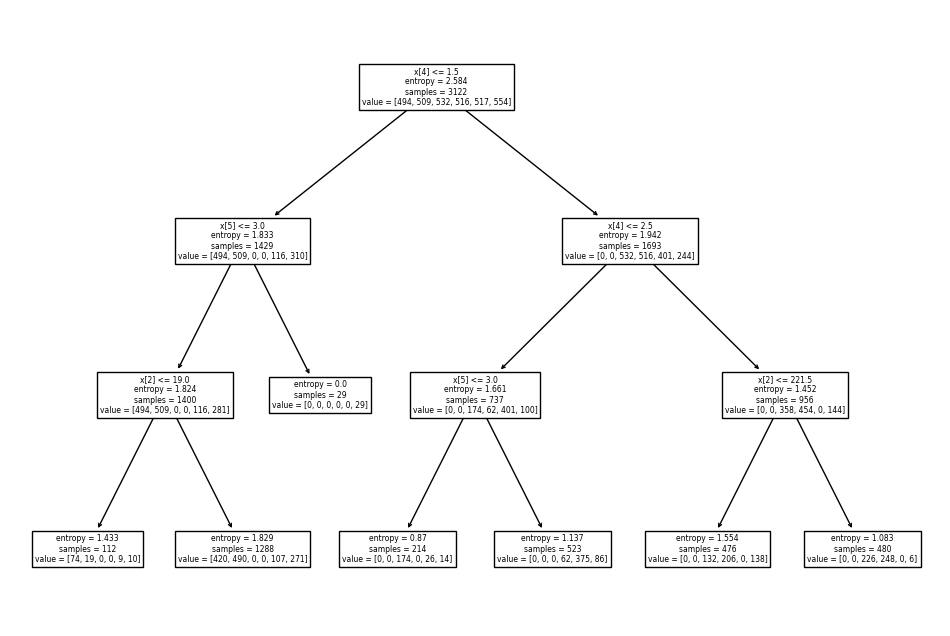

In [364]:
#Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [365]:
X = df.drop(['Type', 'Temperature', 'Absolute_Magnitude'], axis=1)
y = df['Type']

In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [367]:
encoder = ce.OrdinalEncoder(cols=['Spectral_class', 'color', 'Luminosity', 'Relative_Radius'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [368]:
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with 2 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 2 variable removed : 0.8992


In [369]:
#Confusion matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 46 202   0   0   0   0]
 [ 48 244   0   0   0   0]
 [  0   0  86 161   0   0]
 [  0   0   0 205  27   0]
 [  3  61  14   0 195   0]
 [  4 135   6  56  34  11]]


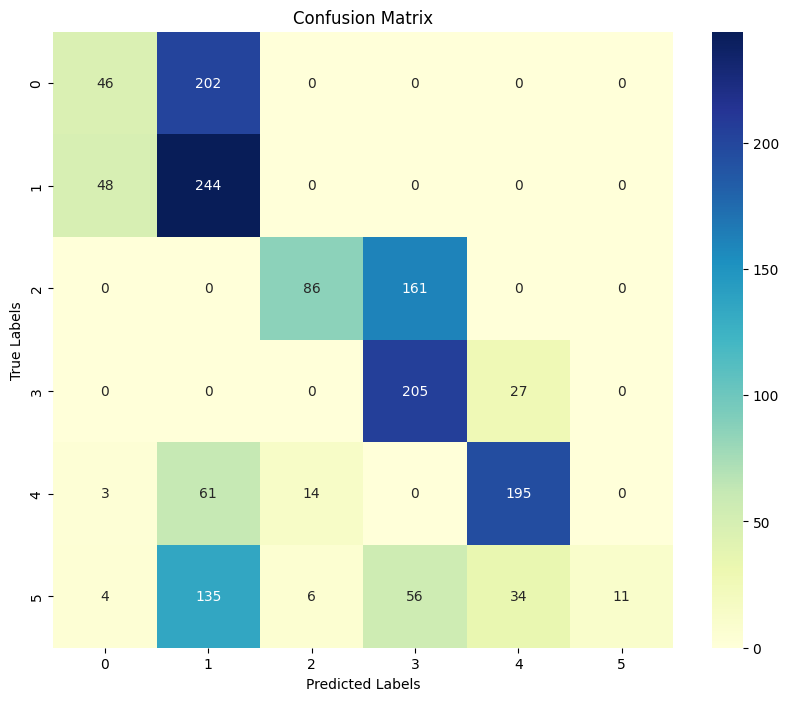

In [370]:
confusion_matrix_data =    [[ 46, 202,   0,   0,   0,   0],
 [ 48, 244,   0,   0,   0,   0],
 [  0,   0,  86, 161,   0,   0],
 [  0,   0,   0, 205,  27,   0],
 [  3,  61,  14,   0, 195,   0],
 [  4, 135,   6,  56,  34,  11]]


# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [371]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.46      0.19      0.26       248
           2       0.38      0.84      0.52       292
           3       0.81      0.35      0.49       247
           4       0.49      0.88      0.63       232
           5       0.76      0.71      0.74       273
           6       1.00      0.04      0.09       246

    accuracy                           0.51      1538
   macro avg       0.65      0.50      0.45      1538
weighted avg       0.64      0.51      0.46      1538



In [372]:
X, y = make_classification(n_samples=1000, n_features=6, random_state=42)

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [374]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_probs = model.predict_proba(X_test)[:, 1]

In [375]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [376]:
auc_score = roc_auc_score(y_test, y_pred_probs)

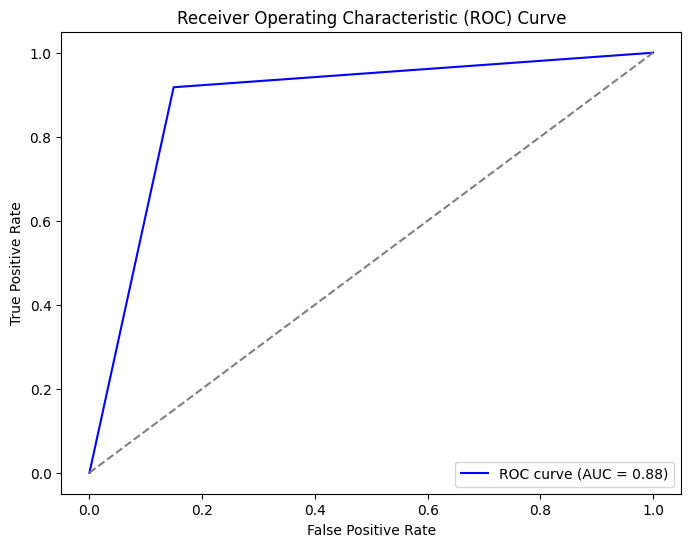

In [377]:
#ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()